In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans #for kmeans algorithm

#For dimensionality reduction.
from sklearn.decomposition import PCA #pca from decomposition module.
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition #decomposition module
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sn
from wordcloud import WordCloud,ImageColorGenerator
#from xgboost import XGBClassifier

In [2]:
# import file from Google drive
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Instacart/data/

In [3]:
# Loading the data 
data_dir = Path('./data')

# Loading Aisles data into Aisles
aisles = pd.read_csv(data_dir.joinpath('aisles.csv'))

# Loading Departments data into Departments
departments = pd.read_csv(data_dir.joinpath('departments.csv'))

# Loading Training order data into orderProductsTrain
orderProductsTrain = pd.read_csv(data_dir.joinpath('order_products__train.csv'))

# Loading the Orders into Orders
orders = pd.read_csv(data_dir.joinpath('orders.csv'))

# Loading Products data into Products
products = pd.read_csv(data_dir.joinpath('products.csv'))

# Loading Prior order data into orderProductsPrior
orderProductsPrior = pd.read_csv(data_dir.joinpath('order_products__prior.csv'))


In [4]:
#checking if dfs have nulls one by one
aisles.isnull().sum()
departments.isnull().sum()
products.isnull().sum()
orderProductsPrior.isnull().sum()
orderProductsTrain
orders.isnull().sum() # orders dataset has some nulls. We will drop them.

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [5]:
orders.dropna(inplace=True)

In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
orderProductsTrain.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
orderProductsPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


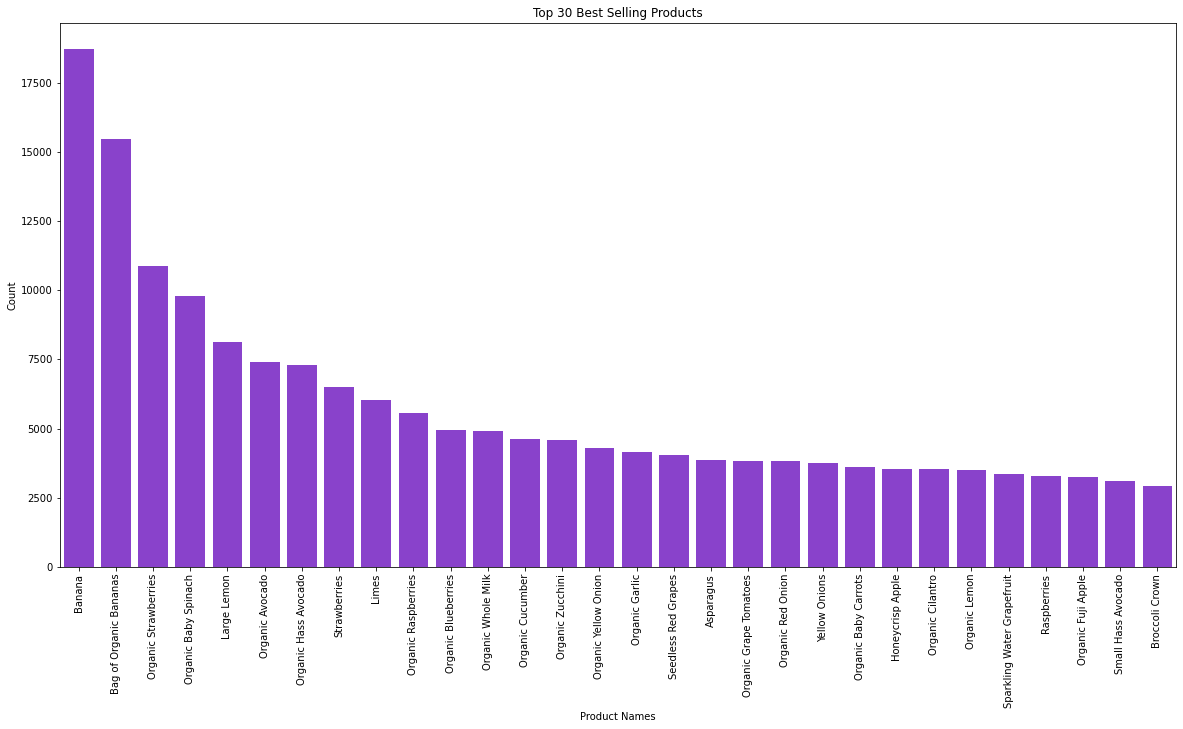

In [12]:
# I. ------------Exploratory Data Analysis ------------

# 1. Product Analysis

# What are the best selling products?
productsCount = orderProductsTrain["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

#top 30 the best selling products
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sn.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v",color="#8A2BE2")
ax.set(xlabel='Product Names',ylabel="Count",title="Top 30 Best Selling Products")
plt.xticks(rotation=90)

mergedData.head(20)

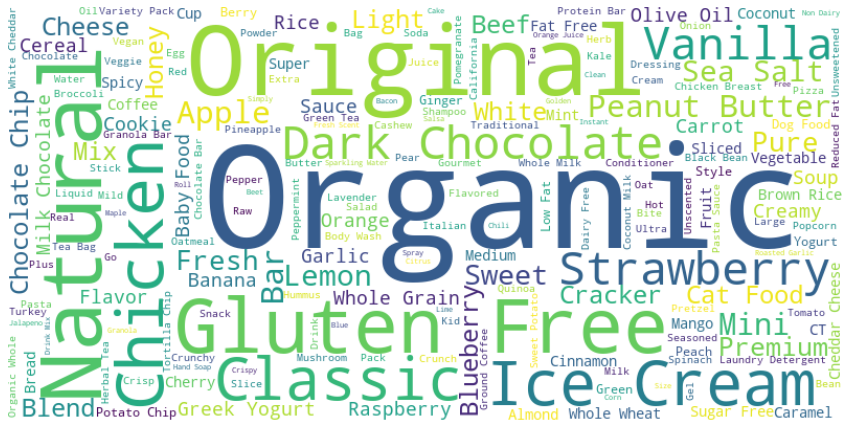

In [13]:
# Frequent words that describe the products
text = ' '.join(mergedData['product_name'])
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# Merging tables together.
products_departments = products.merge(departments, left_on='department_id', right_on='department_id', how='left')
products_departments_aisles = products_departments.merge(aisles, left_on='aisle_id', right_on='aisle_id', how='left')
products_departments_aisles.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [15]:
# How many items is in each product category?
products_departments_aisles.groupby('department')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).head(10)


,department,product_id
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007
7,dairy eggs,3449
11,household,3085
6,canned goods,2092
9,dry goods pasta,1858
19,produce,1684


In [16]:
# Merging products_departments_aisles and order_products_total.
order_products_total = pd.concat([orderProductsPrior, orderProductsTrain]) 
df = order_products_total.merge(products_departments_aisles, left_on='product_id', right_on='product_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


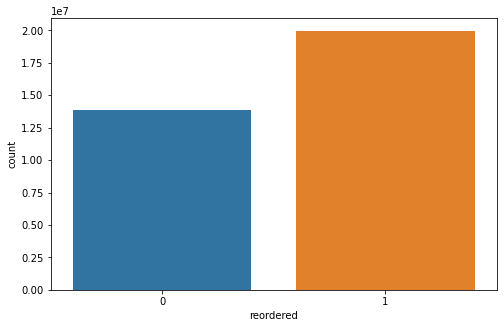

In [17]:
#Reorder distribution
plt.figure(figsize=(8,5))
sn.countplot(x='reordered',data=df)
plt.show()

,aisle_name,count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


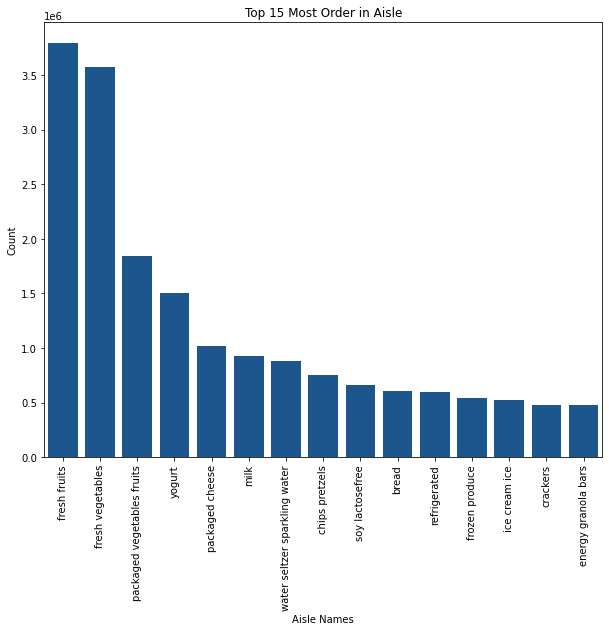

In [18]:
# What's the most ordering in Aisle?
top_15_aisles = df.aisle.value_counts(ascending=False).reset_index().head(15)
top_15_aisles.columns = ['aisle_name', 'count']

fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sn.barplot(data=top_15_aisles,x="aisle_name",y="count",ax=ax,orient="v", color='#0b559f')
ax.set(xlabel='Aisle Names',ylabel="Count",title="Top 15 Most Order in Aisle")
plt.xticks(rotation=90)

top_15_aisles

,department_name,count
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


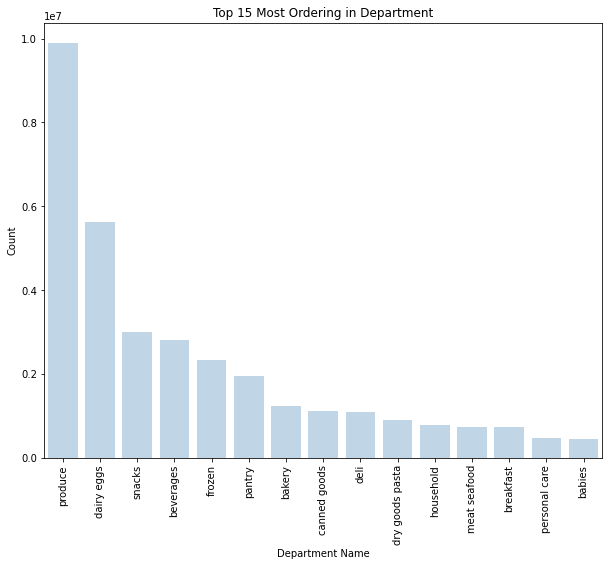

In [19]:
# What's the most ordering in Department?
top_15_department = df.department.value_counts(ascending=False).reset_index().head(15)
top_15_department.columns = ['department_name', 'count']


fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sn.barplot(data=top_15_department,x="department_name",y="count",ax=ax,orient="v", color='#bad6eb')
ax.set(xlabel='Department Name',ylabel="Count",title="Top 15 Most Ordering in Department")
plt.xticks(rotation=90)

top_15_department

In [20]:
# 2. User Analysis

# How many orders the dataset has?
print(len(orders),'orders in total.')
print(orders.eval_set.value_counts() )

3214874 orders in total.
prior    3008665
train     131209
test       75000
Name: eval_set, dtype: int64


In [21]:
# How many users?
print(len(orders[orders.eval_set == 'prior'].user_id.unique()), 'unique customers in total')
print(len(orders[orders.eval_set == 'train'].user_id.unique()), 'unique customers in train set')
print(len(orders[orders.eval_set == 'test'].user_id.unique()), 'unique customers in test set')


206209 unique customers in total
131209 unique customers in train set
75000 unique customers in test set


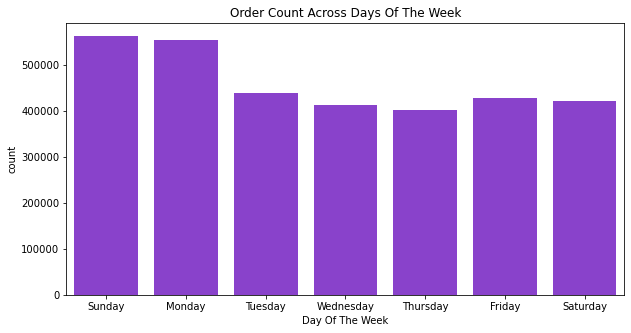

In [22]:
# What day of the week people place their order?
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sn.countplot(color="#8A2BE2",data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")
plt.show()

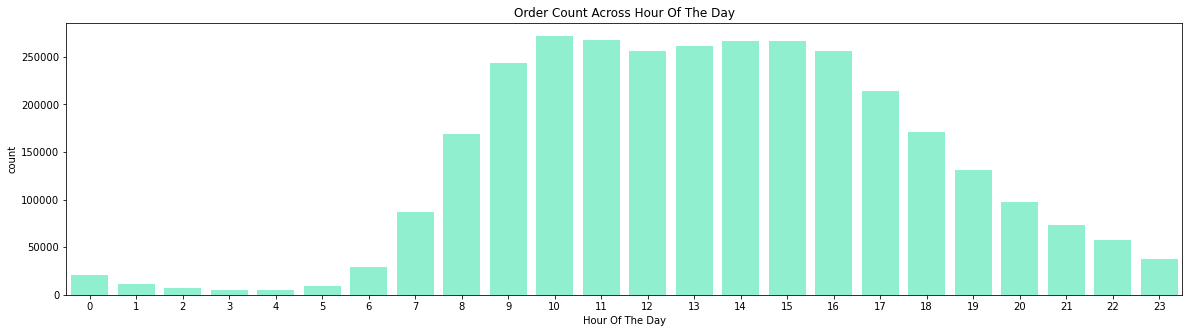

In [23]:
# What hours of the day people generally place their orders?
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(data=orders,x="order_hour_of_day",ax=ax,color="#7FFFD4")
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")
plt.show()

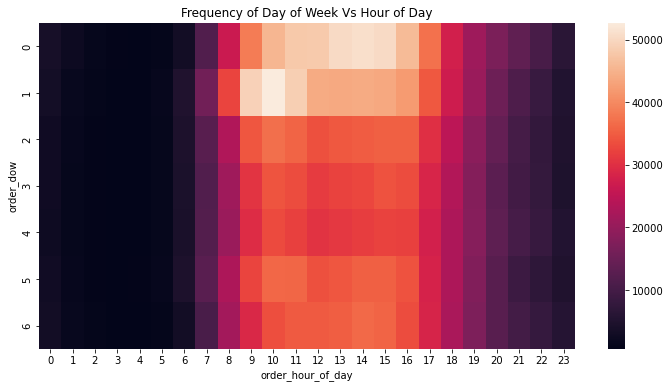

In [24]:
# How's the frequency of day of Week VS hour of Day?
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped = grouped.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sn.heatmap(grouped)
plt.title("Frequency of Day of Week Vs Hour of Day")
plt.show()

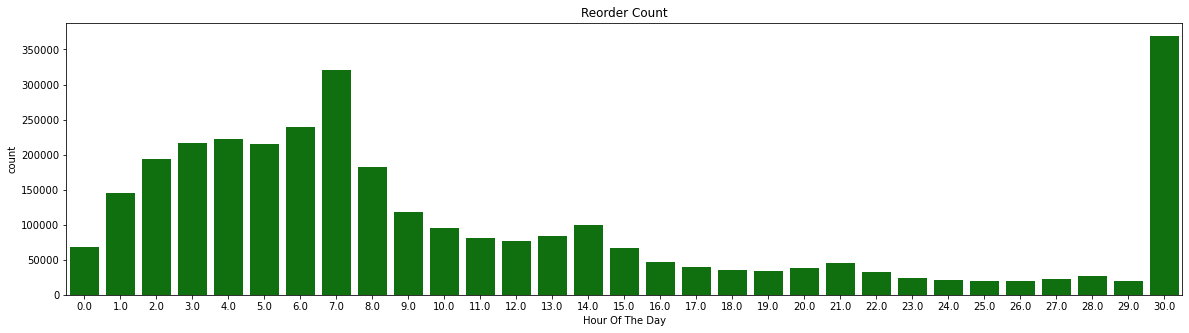

In [25]:
# When do people reorder?
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(color="green",data=orders,x="days_since_prior_order",ax=ax)
ax.set(xlabel='Hour Of The Day',title="Reorder Count")
plt.show()

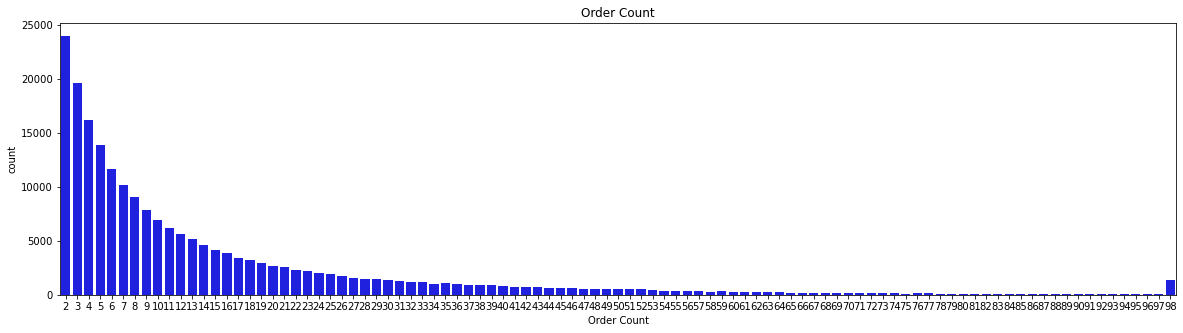

In [26]:
# How many order were generally made by a user?
orderCount = orders[orders["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(color="blue",data=orderCount,x="order_id",ax=ax)
ax.set(xlabel='Order Count',title="Order Count")
plt.show()

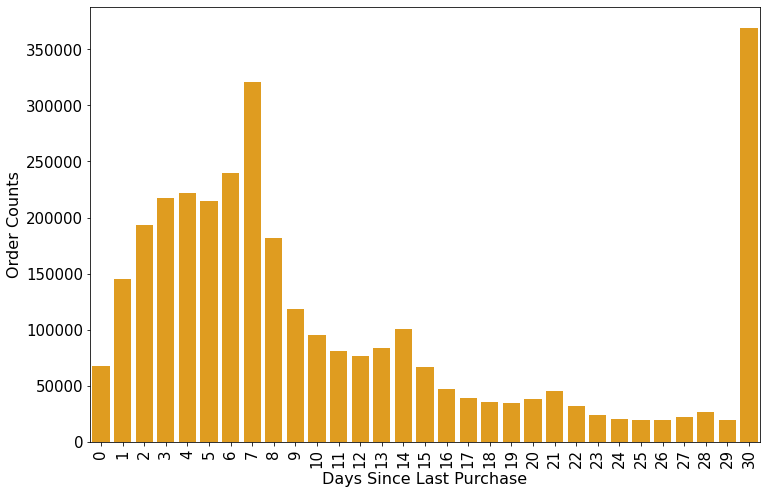

In [27]:
# How often do people purchase?
plt.figure(figsize=(12,8))
sn.countplot(x=orders.days_since_prior_order, color= 'orange')

#plt.title("Number of Orders per Days Since Last Purchase", fontsize=16)
plt.xlabel('Days Since Last Purchase', fontsize=16)
plt.xticks(np.arange(31), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                          24, 25, 26, 27, 28, 29, 30],  fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
plt.show()

In [28]:
# 3. Users Reorder Analysis

# What are the reorder ratio per department and aisle?

# What are the reorder ratio and add_to_cart?

# What's the reorder_prob: prod_2nd_orders/prod_1st_orders ?

# What's the reorder_times: prod_reorder/prod_1st_orders +1 ?

# What's the reorder_ratio: prod_reorder/prod_orders ?


In [29]:
# merge order_prior, products, aisels, department
prior_df = pd.merge(orderProductsPrior, products, on='product_id', how='left')
prior_df=pd.merge(prior_df, aisles, on='aisle_id', how='left')
prior_df = pd.merge(prior_df, departments, on='department_id', how='left')

# merge orders, order_prior
prior_df = pd.merge(orders, prior_df, on='order_id', how='inner')
prior_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19,nuts seeds dried fruit,snacks
2,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce
4,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks


/Users/vanshikagupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


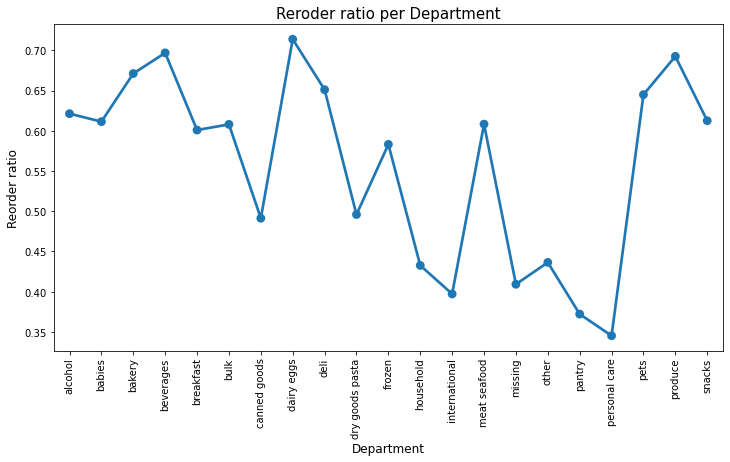

In [30]:
#What are the reorder ratio per department?

#group reorder by Deparment
reorder_by_dept = prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

#The the reorder ratio per department
plt.figure(figsize=(12,6))
sn.pointplot(reorder_by_dept['department'].values, reorder_by_dept['reordered'].values, alpha=0.5)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Reroder ratio per Department", fontsize=15)
plt.xticks(rotation=90)
plt.show()

/Users/vanshikagupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


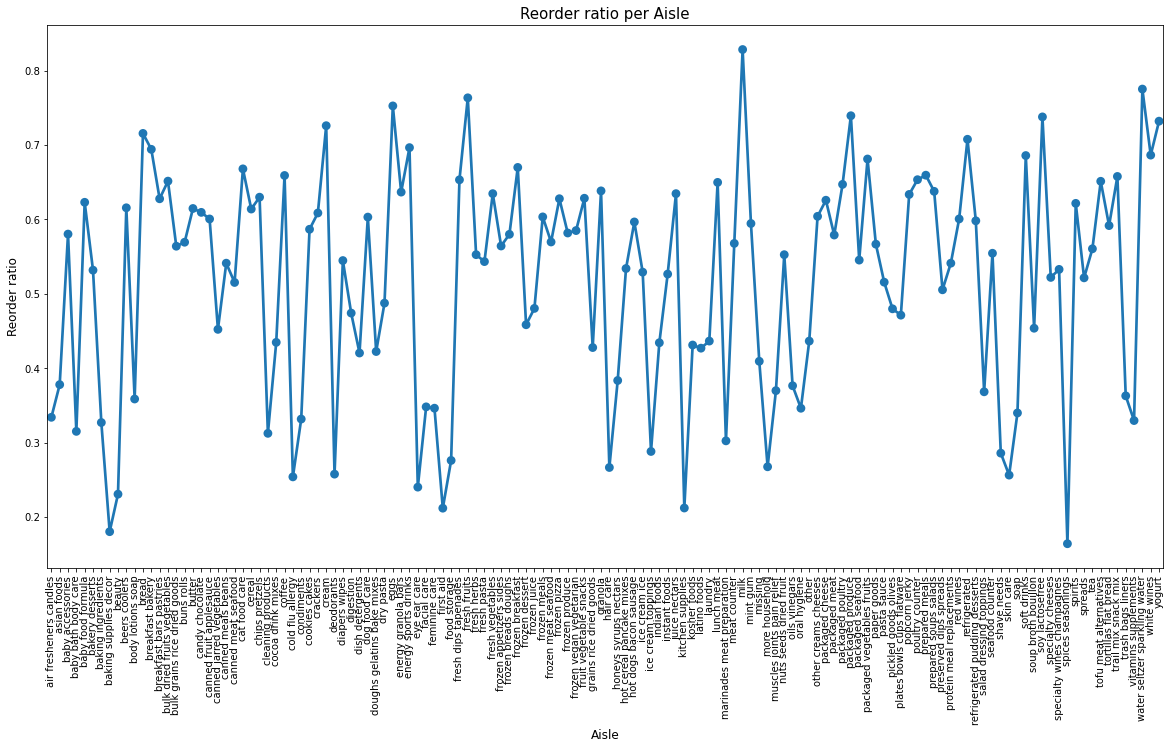

In [31]:
# What are the reorder ratio per aisle?

#group reorder by aisle
reorder_by_aisle = prior_df.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()

#The the reorder ratio per aisle
plt.figure(figsize=(20,10))
sn.pointplot(reorder_by_aisle["aisle"].values, reorder_by_aisle['reordered'].values, alpha=0.5)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.title("Reorder ratio per Aisle", fontsize=15)
plt.xticks(rotation=90)
plt.show()

/Users/vanshikagupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


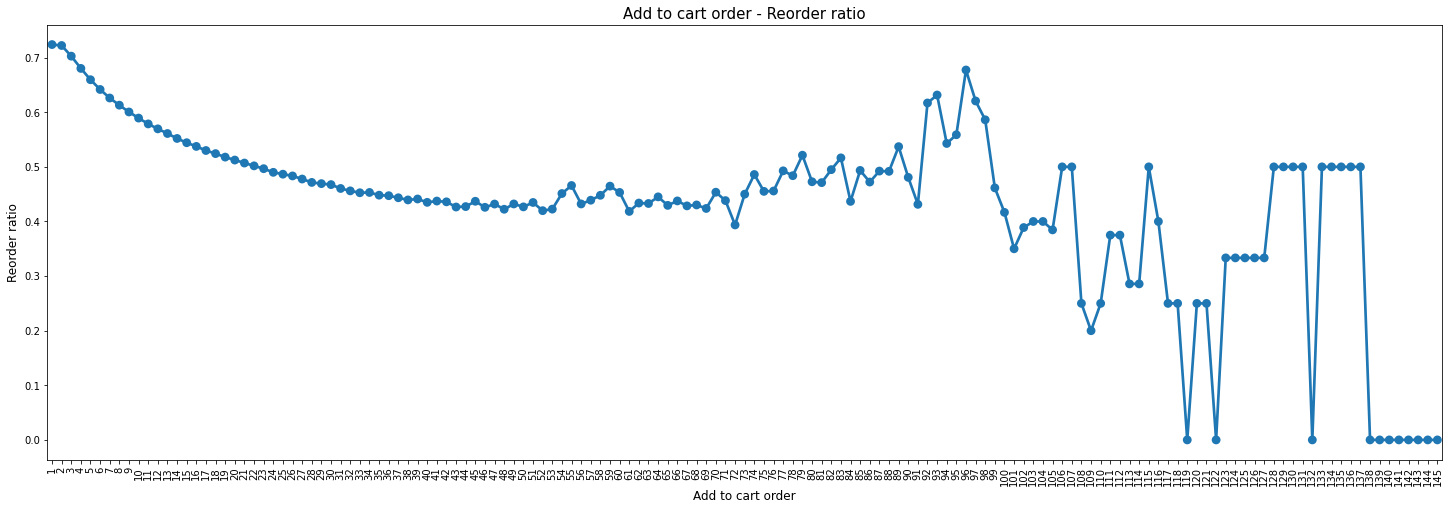

In [32]:
# What are the reorder ratio and add_to_cart?
reorder_by_addcart = prior_df.groupby(["add_to_cart_order"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(25,8))
sn.pointplot(reorder_by_addcart["add_to_cart_order"].values, reorder_by_addcart['reordered'].values, alpha=0.5)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'order_products_prior_df' is not defined

In [34]:
# create prd 
gp = prior_df.groupby('product_id')
prd = pd.DataFrame(gp.size(), columns=['prod_orders'])
prd['prod_reorder'] = gp['reordered'].agg('sum')
prd.reset_index()

tmp = prior_df.copy()
gp = prior_df.groupby(['user_id', 'product_id'])
tmp['prod_order'] = gp.cumcount()
prd['prod_1st_orders'] = tmp[tmp['prod_order']==0].groupby('product_id')['prod_order'].count()
prd['prod_2nd_orders'] = tmp[tmp['prod_order']==1].groupby('product_id')['prod_order'].count()
#del tmp

prd['reorder_prob'] = prd.prod_2nd_orders/prd.prod_1st_orders
prd['reorder_times'] = [i+1 for i in prd.prod_reorder/prd.prod_1st_orders]
prd['reorder_ratio'] = prd.prod_reorder/prd.prod_orders
prd = prd.drop(['prod_reorder', 'prod_1st_orders', 'prod_2nd_orders'], axis=1)
#del products
print('Done')
print()

Done



In [35]:
# What's the reorder_prob: prod_2nd_orders/prod_1st_orders ?

# What's the reorder_times: prod_reorder/prod_1st_orders +1 ?

# What's the reorder_ratio: prod_reorder/prod_orders ?
prd.head()

,prod_orders,reorder_prob,reorder_times,reorder_ratio
product_id,,,,
1,1754,0.399096,2.710843,0.647662
2,87,0.106667,1.160000,0.137931
3,260,0.457143,3.900000,0.780769
4,290,0.331325,1.885542,0.506897
5,14,0.500000,2.500000,0.642857


In [36]:
#Here we have created the crosstab using the user_id and the aisle
user_by_aisle_df = pd.crosstab(prior_df['user_id'], prior_df['aisle'])
user_by_aisle_df.head()
#user_by_aisle_df.shape

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


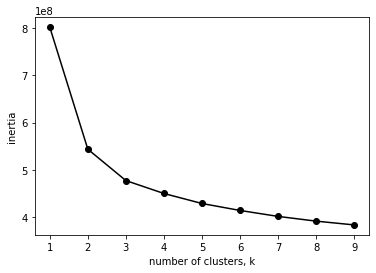

In [37]:
#Using Elbow Method
X = user_by_aisle_df.values
user_by_aisle_df.head()


#Implementing the Elbow method to identify the ideal value of 'k'. 

ks = range(1,10) #here we have selected the range for k from 1 to 10
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)    # Create a KMeans instance with k clusters: model
    model.fit(X)                    # Fit model to samples
    inertias.append(model.inertia_) # Append the inertia to the list of inertias
    
plt.plot(ks, inertias, '-o', color='black') #Plotting. The plot will give the 'elbow'.
plt.xlabel("number of clusters, k")
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [38]:
pca = decomposition.PCA(n_components=5)
pca_user_order = pca.fit_transform(X)

In [39]:
#Checking the % variation explained by the 5 pca components.
pca.explained_variance_ratio_.sum()

0.7001789534465295

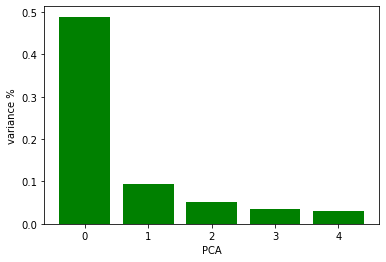

In [40]:
# Plot the explained variances to verify the variation.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA')
plt.ylabel('variance %')
plt.show()

In [41]:
#The model K-means
PCA_components = pd.DataFrame(pca_user_order)
PCA_components.head()

,0,1,2,3,4
0,-22.507005,2.436471,-2.431895,0.007565,0.290895
1,5.818795,35.590422,10.148416,15.261514,-6.805358
2,-9.491096,1.164906,-8.336603,0.169125,-0.215032
3,-26.359757,-0.825700,-1.933157,2.552792,-0.176915
4,-21.483427,-1.337097,-0.412183,3.015730,0.612108


In [42]:
kmeans = KMeans(n_clusters=5)
X_clustered = kmeans.fit_predict(pca_user_order)

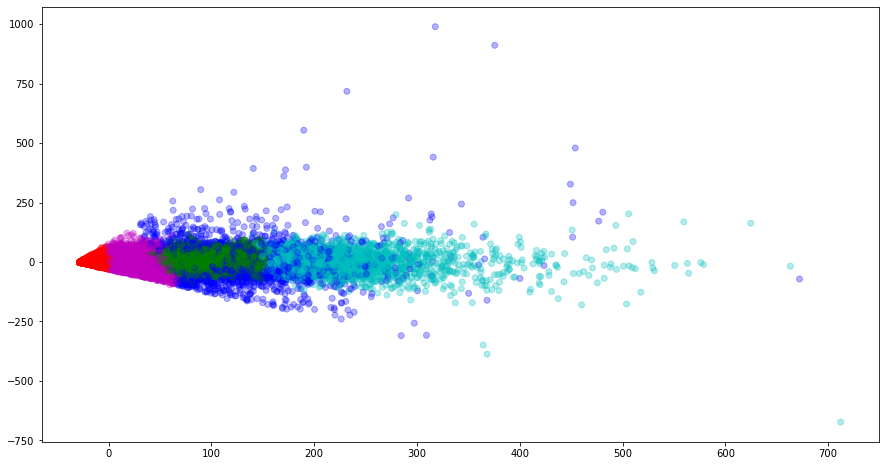

In [43]:
label_color_mapping = {0:'r', 1: 'g', 2: 'b',3:'c' , 4:'m'}
label_color = [label_color_mapping[l] for l in X_clustered]

#Scatterplot showing the cluster to which each user_id belongs.
plt.figure(figsize = (15,8))
plt.scatter(pca_user_order[:,0],pca_user_order[:,2], c= label_color, alpha=0.3) 
plt.xlabel = 'X-Values'
plt.ylabel = 'Y-Values'
plt.show()

In [44]:
#Mapping clusters to users.
user_by_aisle_df['cluster']=X_clustered

In [45]:
#Checking cluster concentration. 
user_by_aisle_df['cluster'].sort_values(ascending = False)

user_id
103105    4
59476     4
163177    4
163175    4
163174    4
         ..
79811     0
79812     0
79813     0
79814     0
206209    0
Name: cluster, Length: 206209, dtype: int32

In [46]:
#The cluster mapping.
user_by_aisle_df.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,4
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,4,4
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2,0,14,0


In [47]:
c0 = user_by_aisle_df[user_by_aisle_df['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_by_aisle_df[user_by_aisle_df['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_by_aisle_df[user_by_aisle_df['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_by_aisle_df[user_by_aisle_df['cluster']==3].drop('cluster',axis=1).mean()
c4 = user_by_aisle_df[user_by_aisle_df['cluster']==4].drop('cluster',axis=1).mean()
c5 = user_by_aisle_df[user_by_aisle_df['cluster']==5].drop('cluster',axis=1).mean()

In [48]:
user_by_aisle_df.pivot_table(index='cluster',aggfunc='count')

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,149431,149431,149431,149431,149431,149431,149431,149431,149431,149431,...,149431,149431,149431,149431,149431,149431,149431,149431,149431,149431
1,11508,11508,11508,11508,11508,11508,11508,11508,11508,11508,...,11508,11508,11508,11508,11508,11508,11508,11508,11508,11508
2,3629,3629,3629,3629,3629,3629,3629,3629,3629,3629,...,3629,3629,3629,3629,3629,3629,3629,3629,3629,3629
3,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,...,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810
4,38831,38831,38831,38831,38831,38831,38831,38831,38831,38831,...,38831,38831,38831,38831,38831,38831,38831,38831,38831,38831


In [49]:
c0.sort_values(ascending=False)[0:20]

aisle
fresh fruits                     5.024787
fresh vegetables                 4.642343
packaged vegetables fruits       2.727199
yogurt                           2.219693
water seltzer sparkling water    1.961347
packaged cheese                  1.773454
milk                             1.568831
chips pretzels                   1.539573
ice cream ice                    1.205145
soft drinks                      1.153201
soy lactosefree                  1.129705
refrigerated                     1.127838
bread                            1.093910
frozen meals                     1.035200
frozen produce                   0.939350
crackers                         0.930630
packaged produce                 0.883572
eggs                             0.855171
cereal                           0.838922
energy granola bars              0.796662
dtype: float64

In [50]:
c1.sort_values(ascending=False)[0:20]

aisle
fresh vegetables                 77.650852
fresh fruits                     62.513034
packaged vegetables fruits       31.578728
yogurt                           17.609402
packaged cheese                  14.657369
milk                             12.586548
soy lactosefree                  10.125739
water seltzer sparkling water     9.062478
fresh herbs                       8.810219
frozen produce                    8.629475
bread                             8.580205
chips pretzels                    8.247741
eggs                              7.492006
refrigerated                      7.383212
ice cream ice                     5.919447
lunch meat                        5.712287
crackers                          5.667188
canned jarred vegetables          5.615050
baby food formula                 5.521985
soup broth bouillon               5.371220
dtype: float64

In [51]:
c3.sort_values(ascending=False)[0:20]

aisle
fresh vegetables                 173.465125
fresh fruits                     147.862633
packaged vegetables fruits        66.616014
yogurt                            38.053381
packaged cheese                   28.927046
milk                              27.026690
fresh herbs                       18.874377
soy lactosefree                   18.726690
bread                             17.049110
frozen produce                    16.474021
chips pretzels                    14.707117
baby food formula                 14.488612
water seltzer sparkling water     13.306762
eggs                              12.848399
refrigerated                      12.753381
crackers                          11.533096
lunch meat                        10.483986
canned jarred vegetables          10.380071
baking ingredients                10.101423
energy granola bars                9.825979
dtype: float64

In [52]:
c4.sort_values(ascending=False)[0:20]

aisle
fresh fruits                     28.751874
fresh vegetables                 25.342433
packaged vegetables fruits       14.032680
yogurt                           11.687003
packaged cheese                   7.823054
milk                              7.151580
water seltzer sparkling water     6.906956
chips pretzels                    5.941954
soy lactosefree                   5.199634
refrigerated                      4.767943
bread                             4.654889
frozen produce                    4.210605
ice cream ice                     4.033942
energy granola bars               3.822230
crackers                          3.702763
eggs                              3.662229
lunch meat                        3.196905
frozen meals                      3.129330
cereal                            3.037187
baby food formula                 2.954366
dtype: float64

In [53]:
c0

aisle
air fresheners candles           0.067978
asian foods                      0.327061
baby accessories                 0.013250
baby bath body care              0.015900
baby food formula                0.465673
                                   ...   
trash bags liners                0.092417
vitamins supplements             0.087606
water seltzer sparkling water    1.961347
white wines                      0.117051
yogurt                           2.219693
Length: 134, dtype: float64

In [54]:
c1

aisle
air fresheners candles            0.134950
asian foods                       2.784411
baby accessories                  0.129649
baby bath body care               0.127390
baby food formula                 5.521985
                                   ...    
trash bags liners                 0.320994
vitamins supplements              0.681873
water seltzer sparkling water     9.062478
white wines                       0.137817
yogurt                           17.609402
Length: 134, dtype: float64

## Association Rule Mining

In [58]:
from apyori import apriori

# Train set
train_df = df.copy()
data = train_df[['order_id', 'product_id']]

# grouping products based on order_id
products_per_order_df = data.groupby('order_id').apply(lambda x: ",".join(x.product_id.astype(str))).to_frame()
records = [row[0].split(",") for idx, row in products_per_order_df.iterrows()]

# build the model - min_support value can be decreased for more association rules
association_rules = apriori(records, min_support=0.001, min_confidence=0.10, min_lift= 2, min_lenght=2)

# converting the generator into a list
association_rules_lst = list(association_rules)
print('Length of association rules extracted:')
print(len(association_rules_lst))
print('\nGlimpse of few association rules:')
print(association_rules_lst[:5])

# Visualising the model output in a tabular form
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] if len(tuple(result[2][0][0])) > 0 else "" for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))

output_DataFrame = pd.DataFrame(inspect(association_rules_lst), columns = ['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])

print('\nGlimpse of the model output in tabular form:')
print(output_DataFrame.head(10))

# replacing product_id(s) with their product_name(s)
LHS_product_name = []
for each_prod_id in output_DataFrame['LHS']:
    LHS_product_name.append(products[products.product_id == int(each_prod_id)]['product_name'].item())
RHS_product_name = []
for each_prod_id in output_DataFrame['RHS']:
    RHS_product_name.append(products[products.product_id == int(each_prod_id)]['product_name'].item())
output_DataFrame['LHS'] = LHS_product_name
output_DataFrame['RHS'] = RHS_product_name

# saving the model output
output_DataFrame.to_csv(data_dir.joinpath("recommendations_884_pn.csv"))
# reading the association rules from the saved model output
recommendation_engine = pd.read_csv(data_dir.joinpath("recommendations_884_pn.csv"))

# validate data
def recommendations_by_product_name(product_name : str):
    """ Function to return recommendations based on input product id """
    if product_name not in recommendation_engine.LHS.unique():
        return "Sorry no recommendations"
    else:
        return list(set(recommendation_engine[recommendation_engine.LHS == product_name]['RHS'].tolist()))

# get recommendation for a selected product
selected_product = 'Organic Red Bell Pepper'
print('\nProduct recommendations on selecting product - ', selected_product)
recommendations_by_product_name(selected_product)

Length of association rules extracted:
884

Glimpse of few association rules:
[RelationRecord(items=frozenset({'10132', '21137'}), support=0.0011631510634972295, ordered_statistics=[OrderedStatistic(items_base=frozenset({'10132'}), items_add=frozenset({'21137'}), confidence=0.20772843723313408, lift=2.5222590870876633)]), RelationRecord(items=frozenset({'10246', '21903'}), support=0.0013965583041424855, ordered_statistics=[OrderedStatistic(items_base=frozenset({'10246'}), items_add=frozenset({'21903'}), confidence=0.18776117004178722, lift=2.4960348786751694)]), RelationRecord(items=frozenset({'22935', '10246'}), support=0.0010953105466899656, ordered_statistics=[OrderedStatistic(items_base=frozenset({'10246'}), items_add=frozenset({'22935'}), confidence=0.14725972356155576, lift=4.185864772792324)]), RelationRecord(items=frozenset({'47209', '10246'}), support=0.0010558614355949928, ordered_statistics=[OrderedStatistic(items_base=frozenset({'10246'}), items_add=frozenset({'47209'}), co

['Organic Baby Spinach',
 'Organic Strawberries',
 'Organic Garlic',
 'Green Bell Pepper',
 'Organic Zucchini',
 'Limes',
 'Organic Yellow Onion',
 'Organic Raspberries',
 'Organic Cucumber',
 'Organic Hass Avocado',
 'Organic Bell Pepper',
 'Organic Avocado']